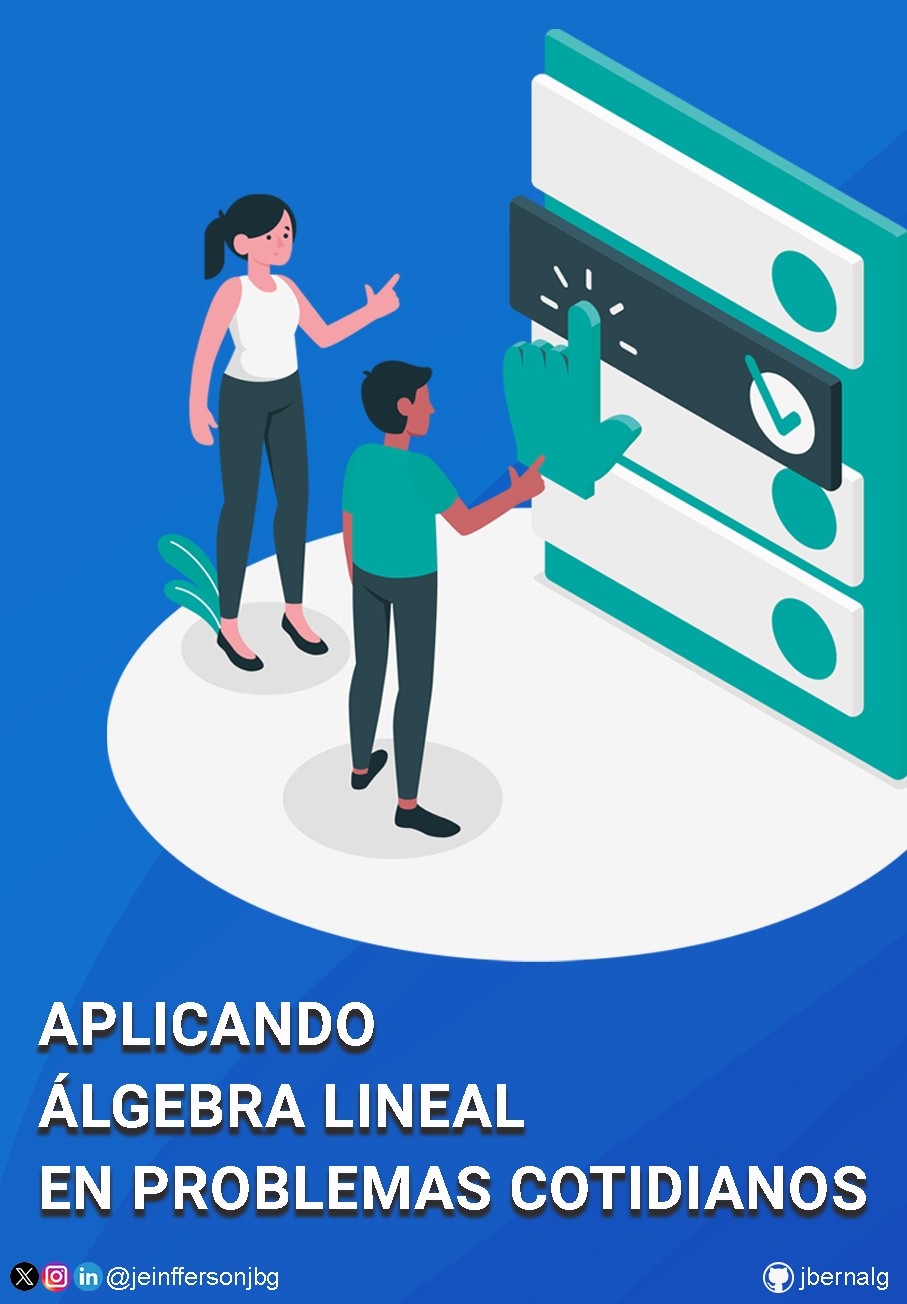









# Proyecto de optimización con Álgebra Lineal

La optimización juega un papel crucial 👌🏻 en una amplia gama de campos que van desde la ingeniería hasta la logística. Esto ha hecho que las técnicas de optimización basadas en el álgebra lineal ↗ se vuelvan indispensables. En este proyecto abordarémos un problema de optimización del mundo real 🌍 utilizando los conceptos de **Norma** y **Distancia**.

Ambos conceptos nos permiten medir y cuantificar la separación entre puntos ▫, conjunto de puntos ▫▫▫ o funciones proporcionando una comprensión profunda de la estructura y la distribución de los datos, así como una base sólida para formular y resolver problemas ⁉ de optimización para la toma de decisiones.

Imagina 💭 que necesitamos arrendar un apartamento 🏨 y tenemos tanta información 📊 de muchos de ellos que se nos dificulta organizar las citas 😥, con lo cual, podríamos estar perdiendo una potencial oportunidad!. Te invito a continuar con la lectura 👀📖 donde te mostraré cómo implementar los conceptos de **Distancia** y **Norma** para dar solución a este problema 😉.

# Conceptos de Álgebra

## Norma

La magnitud de un vector se define a través de la *norma Euclidiana* como sigue:

$$
||x|| = \displaystyle\sqrt{x_{0}^2 + x_{1}^2 + \cdots + x_{n-1}^{2}} = \displaystyle\sqrt(x^Tx)
$$

Donde $x$ es un $n$-vector. Ejemplo, calculemos la magnitud del vector $x^T = [1,2,3]$

$$
||x|| = \displaystyle\sqrt{1^2 + 2^2 + 3^2} = \sqrt{14} \approx 3.74
$$


## Propiedades de la Norma

Sean $x$, $y$ son $n$-vectores y $\beta$ un escalar cualquiera, tenemos que la norma cumple:
* Homogeneídad no negativa: $||\beta x|| = |\beta|\cdot ||x||$

* Desigualdad del triángulo: $||x+y|| \le ||x|| + ||y||$ 

* No-negatividad: $||x||\ge 0$ y además $||x|| = 0$ si y solamente si $x = \mathbf{0}$

## Distancia entre vectores

Podemos usar la norma para definir la distancia entre dos vectores $\mathbf{a}$ y $\mathbf{b}$ como la norma de la diferencia de los vectores.

$$
dist(\mathbf{a},\mathbf{b}) = ||\mathbf{a} - \mathbf{b}|| = \displaystyle\sqrt{(a_{0}-b_{0})^2 + (a_{1}-b_{1})^2 + \cdots + (a_{n-1}-b_{n-1})^2}
$$

Ejemplo, tenemos los vectores $\mathbf{x}$ y $\mathbf{y}$ en $\mathbb{R}^2$

$$
\mathbf{x} = \begin{bmatrix} 2\\1 \end{bmatrix},\; \qquad \mathbf{y} = \begin{bmatrix} 1\\2 \end{bmatrix}
$$

Calculemos la distancia euclideana entre ambos vectores

$||\mathbf{x}-\mathbf{y}||_{2} = \displaystyle\sqrt{(2-1)^{2} + (1-2)^{2}} = \displaystyle\sqrt{2}$. 

A esto se el llama _norma Euclidiana_ o *distancia Euclidiana*. Siempre que nuestro espacio admita una $\mathbf{L^p}$-norma entonces podremos generalizar la norma anterior como:

$$
||x||_{p} = \left(|x_{0}|^p + |x_{1}|^p + \cdots + |x_{n-1}|^p\right)^{1/p} \qquad con \;\; 1\le p
$$

Por eso es que la norma Euclidiana también es conocida como la *norma $L_{2}$*. Hay otras normas que recibe nombres:

- Si $p=1$ tenemos la norma $L_{1}$ y esta es llamada _la métrica del taxista_ o _la métrica de Manhattan_. 

- Si tomamos $p \to \infty$ entonces tenemos $L_{\infty}$ y esta es llamada _la métrica del máximo_. 

Es muy importante saber qué métrica estamos usando para medir distancias ya que la forma en la que medimos distancias está en total correspondencia con la configuración y la percepción el espacio. Por ejemplo, mientras que en la métrica Euclidiana la distancia corresponde a la más corta entre los dos vectores en el espacio plano, en el caso de la métrica del taxista, es la más corta pero no será el segmento más directo sino por _bloques_.

## Nocion de Distancia

Es importante notar que a pesar de que medimos distancias no existen propiamente nociones de *cerca* y *lejos*. Si tomamos los siguientes $4$-vectores

$$
\mathbf{u} = \begin{bmatrix}1.8 \\ 2.8 \\ -3.7 \\ 4.7 \end{bmatrix}, \qquad  \mathbf{v} = \begin{bmatrix}0.6 \\ 2.1 \\ 1.9 \\ -1.4 \end{bmatrix}, \qquad \mathbf{w} = \begin{bmatrix}2.0 \\ 1.9 \\ -4.0 \\ 4.6 \end{bmatrix}
$$

Tenemos que las distancia entre los vectores es:

$$
||\mathbf{u}-\mathbf{v}|| = 8.36, \qquad ||\mathbf{u}-\mathbf{w}|| = 0.38, \qquad ||\mathbf{v}-\mathbf{w}|| = 8.63
$$

De esta manera ya tenemos noción de cercano o lejos, de no ser porque comparamos no tendríamos estas nociones. 

'

# Análisis del problema

El gran problema es que llegamos a recolectar tanta informacóon sobre anuncios y contactos que organizarnos para ir a las visitas puede parecer prácticamente imposible, dejando volar la oportunidad de un gran apartamento. La solución al problema de las citas, a través del álgebra lineal, consiste de los siguientes pasos: 

1.- Representar nuestro departamento ideal como un vector de características.

2.- Construir el mismo vector para los apartamentos que ya tengamos localizados. 

3.- Calcular la distancia entre estos vectores y el vector que representa al departamento ideal.

4.- Ordenar, de manera ascendente, las distancias y ya tendríamos una lista ordenada en prioridad de contacto y visita de apartamentos según nuestro apartamento ideal.

# Implementación de la Solución

## Paso 1

Supongamos que las características de nuestro apartamento ideal son las siguientes:
- tamaño del apartamento
- número de recámaras
- número de baños
- número de estacionamientos. 

El tamaño del apartamento regularmente se da en metros cuadrados (área), cantidad que tiende a variar mucho, lo cual introduce una gran volumen de ruido. Para resolver este problema vamos a catalogar los tamaños de apartametos en categorías:

- 1 si el área es menor que 60 metros cuadrados.
- 2 si el área es mayor o igual que 60 metros cuadrados pero menor que 80 metros cuadrados.
- 3 si el área es mayor o igual que 80 metros cuadrados pero menor que 110 metros cuadrados.
- 4 si el área es mayor o igual que 110 metros cuadrados pero menor que 130 metros cuadrados.
- 5 si el área es mayor o igual que 130 metros cuadrados.

Nuestro apartamento ideal viene dado por el siguiente vector:

$$
\mathbf{I} = \begin{bmatrix} 3\\ 2\\ 2\\1 \end{bmatrix}
$$

donde: 
- El primer elemento con valor de 3 corresponde a la categoría de tamaño para un rango que va de los 80 a 110 metros cuadrados.
- El segundo elemento con valor de 2 esta asociado a la cantidad de recamaras.
- El tercer elemento con valor de 2 corresponde a la cantidad de baños.
- El cuarto elemento con valor de 1 corresponde al número de estacionamiento.

Representamos el vector del apartamento ideal en Python como sigue:

In [12]:
# importamos la libreria Numpy
import numpy as np

# Vector de apartamento ideal
I = np.array([3,2,2,1])

I

array([3, 2, 2, 1])

## Paso 2

Ahora imaginemos que tenemos la información de 5 apartamentos. Al hacer la conversión como la hecha con el apartamento ideal, obtenemos los siguientes vectores:

$$
\mathbf{A_{1}} = \begin{bmatrix}4 \\3 \\ 3\\3 \end{bmatrix}, \qquad \mathbf{A_{2}} = \begin{bmatrix}3 \\3 \\ 2\\1 \end{bmatrix}, \qquad \mathbf{A_{3}} = \begin{bmatrix}5 \\4 \\ 3\\0 \end{bmatrix}, \qquad \mathbf{A_{4}} = \begin{bmatrix}1 \\2 \\ 1\\0 \end{bmatrix}, \qquad  \mathbf{A_{5}} = \begin{bmatrix}2 \\1 \\ 1\\2 \end{bmatrix}
$$

Representamos los vectores para cada apartamento en Python como sigue:

In [13]:
A_1 = np.array([4,3,3,3])
A_2 = np.array([3,3,2,1])
A_3 = np.array([5,4,3,0])
A_4 = np.array([1,2,1,0])
A_5 = np.array([2,1,1,0])

print(A_1)
print(A_2)
print(A_3)
print(A_4)
print(A_5)

[4 3 3 3]
[3 3 2 1]
[5 4 3 0]
[1 2 1 0]
[2 1 1 0]


## Paso 3

En este punto, el problema se reduce en encontrar el vector más cercano al vector ideal. Básicamente si tenemos una colección de N $n$-vectores $z_{0},z_{1},\dots,z_{N-1}$ vamos a decir que $z_{i}$ es el vecino más cercano del vector $x$ si 

$$
||x-z_{i}|| \le ||x - z_{j}|| \quad con \; \; j = 0,\dots, N-1
$$

Aca utilizamos la definición de **Norma**. Calculamos las distancias entre los vectores con la librería Pandas como sigue:

In [14]:
print('||I-A_1|| =', np.linalg.norm(I - A_1))
print('||I-A_2|| =', np.linalg.norm(I - A_2))
print('||I-A_3|| =', np.linalg.norm(I - A_3))
print('||I-A_4|| =', np.linalg.norm(I - A_4))
print('||I-A_5|| =', np.linalg.norm(I - A_5))

||I-A_1|| = 2.6457513110645907
||I-A_2|| = 1.0
||I-A_3|| = 3.1622776601683795
||I-A_4|| = 2.449489742783178
||I-A_5|| = 2.0


## Paso 4

Como el resultado anterior es realizado sobre pocos apartamentos podemos visualizar de inmediato, sin necesidad de ordenar, que el apartamento con distancia más pequeña que es el $A_{2}$. Sin embargo, para grandes cantidades esto podría ser un gran problema y aquí es importante ordenar las distancias de forma ascendente.

Para lograrlo vamos a crear una función que solicite un vector de vectores, el cual contendrá todos los vectores de los apartamentos y aparte, el vector del apartamento ideal. La función devuelve un DataFrame con las distancias ordenadas.

In [15]:
# Creamos un vector de vectores con las distancias de los apartamentos
options = np.array([A_1,A_2,A_3,A_4,A_5])

options

array([[4, 3, 3, 3],
       [3, 3, 2, 1],
       [5, 4, 3, 0],
       [1, 2, 1, 0],
       [2, 1, 1, 0]])

In [16]:
# importamos la libreria Pandas
import pandas as pd

# Creamos la funcion
def ordenation(options,ideal):
    # creamos una lista vacia
    results = []

    # Contador
    index = 0

    # recorremos todos los vectores
    for option in options:
        index += 1

        # Generamos un array con el nombre y la distancia
        result = ['A_' + str(index), np.linalg.norm(ideal - option)]

        # guardamos el array en la lista results
        results.append(result)

    # Crea un df con los resultados ordenados
    df = pd.DataFrame(results, columns=['Departamento', 'Tasa']) #.nsmallest(1, 'Tasa')

    # ordena los resultados de forma ascendente 
    df = df.sort_values(by='Tasa', ascending=True)

    # Devuelve el dataframe
    return df

In [17]:
# llamamos la funcion con los parametros indicados
ordenation(options, I)

,Departamento,Tasa
1,A_2,1.000000
4,A_5,2.000000
3,A_4,2.449490
0,A_1,2.645751
2,A_3,3.162278


De esta manera, ya tendremos la lista de los apartamentos a visitar ordenada en función de nuestras prioridades. Vemos que el apartamento que más se ajusta a lo que buscamos es el $A_{2}$ seguido del $A_{5}$. Ahora solo queda discutir las condiciones y un poco el precio para quedarnos con el indicado!

# Características de mayor prioridad

Imagina que de las características de nuestro apartamento ideal damos mayor relevancia al número de recamaras y al número de parqueaderos. Como podemos reflejar estas preferencias a la hora de ordenar las citas?. La respuesta es agregando una ponderación de importancia sobre cada característica.

Para lograrlo, creamos un vector de ponderación con valores entre 0 y 1 para cada característica los cuales representan la importancia que le damos a cada una. Mientras más cercano a 1 mayor es la importancia dada:

- Tamaño del apartamento: 0.3
- Número de recamaras: 0.9
- Número de baños: 0.4
- Número de parqueaderos: 1

Al número de recamaras y de parqueadero damos valores cercanos a 1. Creamos el vector con la librería Numpy como sigue: 

In [18]:
arr_pond = np.array([
                     0.3, # tamano apartamento
                     0.9, # numero de recamaras
                     0.4, # numero de banos
                     1    # numero de parqueaderos
                     ])

Lo siguiente es crear una función que pondere los valores de un vector con el vector de ponderación dado (arr_pond). Recuerda que el vector de ponderación debe tener las misma dimensiones que los demás vectores.

In [22]:
#Funcion de ponderacion de vectores
def pond(vect, arr_pond=arr_pond):
    return vect * arr_pond

Finalmente, creamos una función como la del Paso 4 que refleje la ponderación de importancia.

In [23]:
# Funcion de ordenacion considerando ponderacion de importancia
def ordenationPond(options,ideal):
    
    # creamos una lista vacia
    results = []

    # Contador
    index = 0

    # recorremos todos los vectores
    for option in options:
        index += 1

        # Generamos un array con el nombre y la distancia
        result = ['A_' + str(index), np.linalg.norm(pond(ideal) - pond(option))]

        # guardamos el array en la lista results
        results.append(result)

    # Crea un df con los resultados ordenados
    df = pd.DataFrame(results, columns=['Departamento', 'Tasa']) #.nsmallest(1, 'Tasa')

    # ordena los resultados de forma ascendente 
    df = df.sort_values(by='Tasa', ascending=True)

    # Devuelve el dataframe
    return df

Ahora, llamamos la función ordenationPond y le pasamos el vector de vectores de los apartamentos y el vector de nuestro apartamento ideal.

In [24]:
ordenationPond(options,I)

,Departamento,Tasa
1,A_2,0.900000
3,A_4,1.232883
4,A_5,1.435270
2,A_3,2.181742
0,A_1,2.249444


La lista de citas a cambiado. A pesar que el apartamento $A_{2}$ siguen siendo el que más se ajusta a lo que buscamos, el apartamento $A_{5}$ ya no es el siguiente sino que es el $A_{4}$.

# Conclusiones

En este proyecto te mostré 👀 cómo un problema común de la vida diaria puede resolverse mediante conceptos de álgebra lineal (la Norma y la Distancia entre vectores) ➡. A pesar que el proyecto cuenta con poco datos, puede generalizarse a grandes cantidades 📊 y tambien puede adaptarse a problemas similares donde cuentes con las características de un objeto que puedas representar a traves de un vector ↗.

A pesar de su reputación de compleja 😬, con este proyecto espero que hayas entendido el álgebra lineal de forma sencilla mediante explicaciones detalladas, su directa aplicación 😉 y su gran relevancia en el campo de la ciencia de datos 🌍📈. Su uso va desde la representación y manipulación de datos hasta la modelización estadística, la reducción de dimensionalidad, métodos de optimización y el aprendizaje automatico. 

Espero que ya no imagines un signo de interrogación ❓ cuando te hablen de este tema y que te lleves una idea de su utilidad para que al enfrentarte con un problema similar 🤔 tengas una orientación de como abordarlo 👍. Gracias por llegar hasta el final y te invito a seguirme para que no te pierdas de más contenido sobre **Ciencia de Datos**.